Taille du jeu de données : 30000 lignes et 7 colonnes.

## Aperçu des 5 premières lignes ##
                         transaction_id  step      type  amount customer_id  \
0  38d8cd1a-ab64-48a8-982b-547db096f8a5   421   PAYMENT  311000   C13646530   
1  2440928e-8a4c-4e74-a9c5-6329668be13d   325   PAYMENT  399600    C9452763   
2  973c2a3c-5676-477c-ac30-81334b01e90d   565   PAYMENT    7500   C31260354   
3  5413d0f4-b4f0-406f-bd91-91de1dce573c   511  TRANSFER   94000    C8841991   
4  c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98    63  CASH_OUT   15000    C3176716   

   age  is_fraud  
0   24         0  
1   25         0  
2   38         0  
3   26         0  
4   26         0  

## Types de Données et Valeurs Manquantes ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  30000 non-null  object
 1   step            30000 non-nu

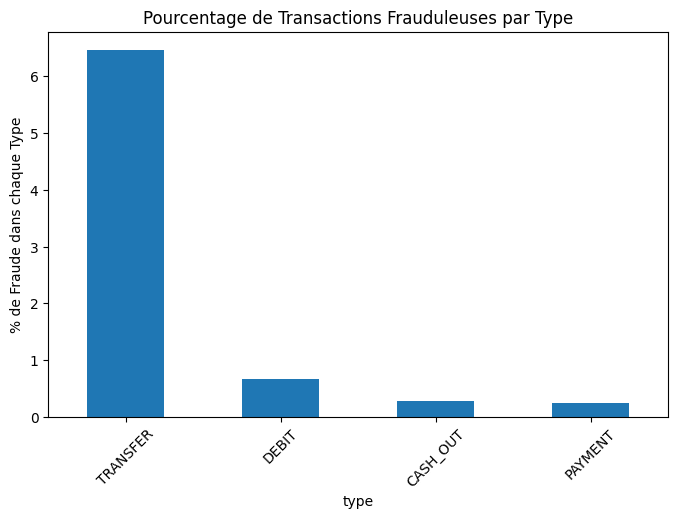


## 4. Feature Engineering Temporel ##


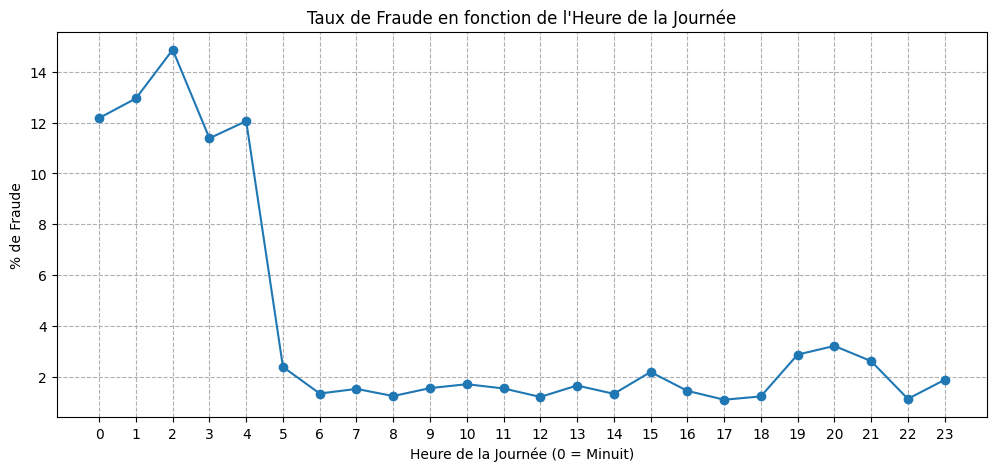

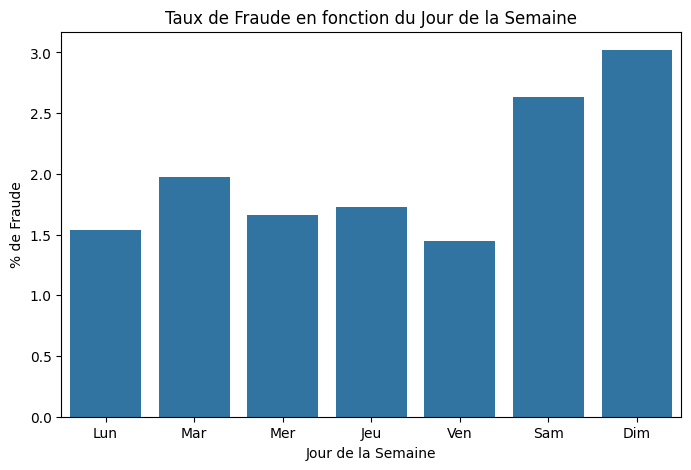


## 5. Préparation Finale du Dataset ##

Variables finales pour la modélisation:
['amount', 'age', 'is_fraud', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']

Dimensions finales : (30000, 37)
   amount  age  is_fraud  type_DEBIT  type_PAYMENT  type_TRANSFER  \
0  311000   24         0       False          True          False   
1  399600   25         0       False          True          False   
2    7500   38         0       False          True          False   
3   94000   26         0       False         False           True   
4   15000   26         0       False         False          False   

   day_of_week_0  da

In [15]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de Pandas pour afficher plus de colonnes
pd.set_option('display.max_columns', 100)

# Chargement du dataset d'entraînement
df = pd.read_csv("train.csv")

print(f"Taille du jeu de données : {df.shape[0]} lignes et {df.shape[1]} colonnes.")
print("\n## Aperçu des 5 premières lignes ##")
print(df.head())

print("\n## Types de Données et Valeurs Manquantes ##")
df.info()

print("\n## Statistiques Descriptives des Variables Numériques ##")
print(df.describe())

print("\n## 3. Type de Transaction vs. Fraude ##")

# Nombre de transactions par type
print("Nombre de transactions par Type :")
print(df['type'].value_counts())

# Pourcentage de fraude par Type
type_fraud_pivot = pd.crosstab(df['type'], df['is_fraud'], normalize='index') * 100
print("\nPourcentage de Fraude (1) par Type de Transaction :")
print(type_fraud_pivot[1].sort_values(ascending=False))

# Visualisation (focus sur la colonne 1: is_fraud=1)
type_fraud_pivot[1].sort_values(ascending=False).plot(kind='bar', figsize=(8, 5))
plt.title('Pourcentage de Transactions Frauduleuses par Type')
plt.ylabel('% de Fraude dans chaque Type')
plt.xticks(rotation=45)
plt.show()


print("\n## 4. Feature Engineering Temporel ##")

# Création des nouvelles colonnes
df['hour'] = df['step'] % 24 # Heure de la journée (0 à 23)
df['day_of_week'] = (df['step'] // 24) % 7 # Jour de la semaine (0=Lun, 6=Dim)

# --- Analyse de la Fraude par Heure ---
hour_fraud_rate = df.groupby('hour')['is_fraud'].mean() * 100

plt.figure(figsize=(12, 5))
hour_fraud_rate.plot(kind='line', marker='o')
plt.title('Taux de Fraude en fonction de l\'Heure de la Journée')
plt.ylabel('% de Fraude')
plt.xlabel('Heure de la Journée (0 = Minuit)')
plt.xticks(range(24))
plt.grid(True, linestyle='--')
plt.show()

# --- Analyse de la Fraude par Jour de la Semaine ---
day_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
day_fraud_rate = df.groupby('day_of_week')['is_fraud'].mean() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=day_fraud_rate.index, y=day_fraud_rate.values)
plt.title('Taux de Fraude en fonction du Jour de la Semaine')
plt.ylabel('% de Fraude')
plt.xlabel('Jour de la Semaine')
plt.xticks(range(7), day_labels, rotation=0)
plt.show()

print("\n## 5. Préparation Finale du Dataset ##")

# Création du DataFrame préparé
df_prep = df.copy()

# 1. Suppression des colonnes inutiles
columns_to_drop = ['transaction_id', 'customer_id', 'step']
df_prep = df_prep.drop(columns=columns_to_drop)

# 2. Préparation des Variables Catégorielles (type)
# Encodage One-Hot pour 'type'. drop_first=True évite la multicolinéarité.
df_prep = pd.get_dummies(df_prep, columns=['type'], drop_first=True)

# 3. Préparation des Variables Catégorielles (day_of_week, hour)
# Il est préférable d'encoder ces variables temporelles comme catégorielles car 23 n'est pas "plus grand" que 1.
df_prep = pd.get_dummies(df_prep, columns=['day_of_week', 'hour'])


print("\nVariables finales pour la modélisation:")
print(df_prep.columns.tolist())
print(f"\nDimensions finales : {df_prep.shape}")
print(df_prep.head())



## 📊 3. Type de Transaction vs. Fraude ##
Nombre de transactions par Type :
type
PAYMENT     11150
TRANSFER     8160
CASH_OUT     7716
DEBIT        2974
Name: count, dtype: int64

Pourcentage de Fraude (1) par Type de Transaction :
type
TRANSFER    6.458333
DEBIT       0.672495
CASH_OUT    0.272162
PAYMENT     0.242152
Name: 1, dtype: float64


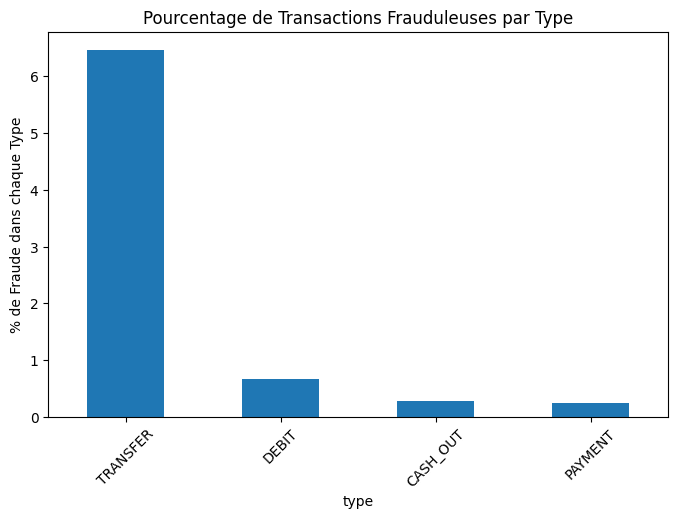


## 4. Feature Engineering Temporel ##


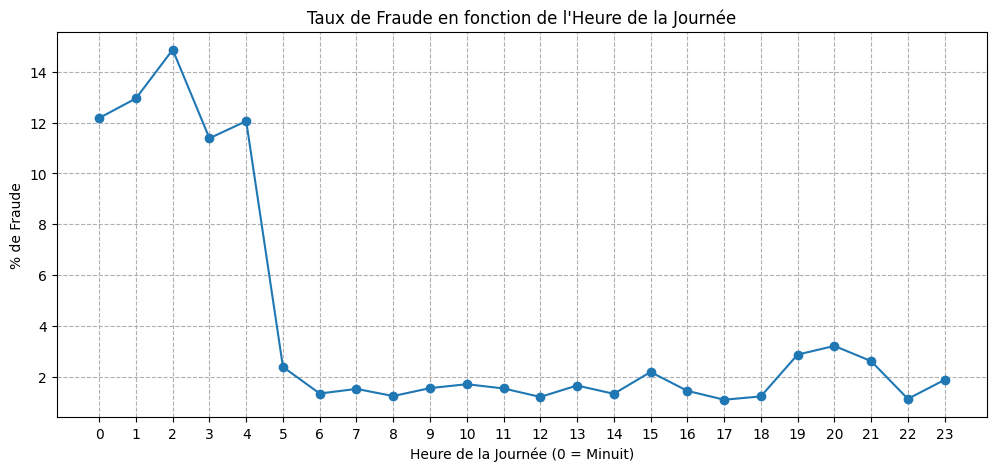

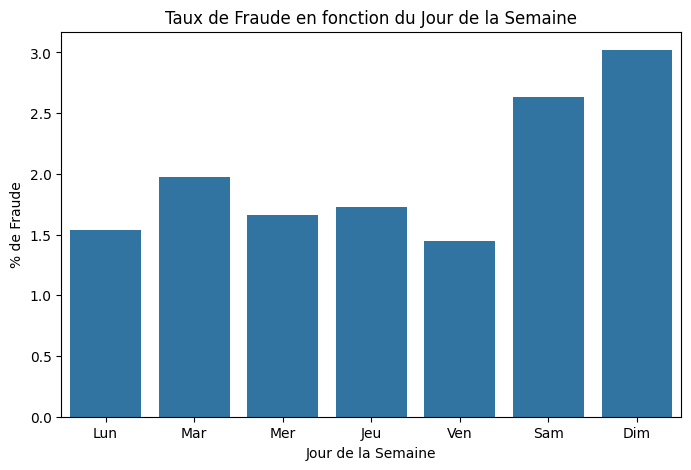


## ⚙️ 5. Préparation Finale du Dataset ##

Variables finales pour la modélisation:
['amount', 'age', 'is_fraud', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']

Dimensions finales : (30000, 37)
   amount  age  is_fraud  type_DEBIT  type_PAYMENT  type_TRANSFER  \
0  311000   24         0       False          True          False   
1  399600   25         0       False          True          False   
2    7500   38         0       False          True          False   
3   94000   26         0       False         False           True   
4   15000   26         0       False         False          False   

   day_of_week_0 